# Driving Pattern Profiling and Classification

## Problem Definition
- **Despite the implementation of various anti-theft technologies, auto-theft incidents continue to rise. The increasing integration of computerized electronic devices in cars has introduced new security vulnerabilities that can be exploited for auto-theft, particularly through keyless entry systems. Traditional anti-theft measures are becoming less effective as sophisticated attacks neutralize these systems. Therefore, there is a critical need for innovative solutions to detect and prevent auto-theft. This study proposes a driver verification method that analyzes driving patterns using sensor data from the vehicle to efficiently detect and respond to potential theft incidents.**

## About Dataset
- **This dataset is comprised of driving data from 10 different drivers, each with 51 features representing their unique driving characteristics. The objective is to determine the effectiveness of our method in distinguishing between these drivers based on their driving patterns. The data was collected across two pathorders represented different routes. Our analysis will investigate how well our method can identify drivers despite variations in routes or external factors.**

### Lets go now for our analysis these features

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### loading data

In [3]:
data = pd.read_csv("../data/raw/Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv")

In [4]:
data

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,Fuel_Pressure,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Flywheel_torque_(after_torque_interventions),Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,Flywheel_torque,Torque_scaling_factor(standardization),Standard_Torque_Ratio,Requested_spark_retard_angle_from_TCU,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Target_engine_speed_used_in_lock-up_module,Glow_plug_control_request,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Wheel_velocity_front_left-hand,Wheel_velocity_rear_right-hand,Wheel_velocity_front_right-hand,Wheel_velocity_rear_left-hand,Torque_converter_turbine_speed_-_Unfiltered,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,0,-0.8,929,5.5,9.0,-5.9,-8.6,95,650,5.5,23.9,2.0,58.2,-5.9,230,1,15,508,0.0,3040,0,0,939.3,0,87,0.0,0.0,0.0,0.0,935.5,1,0,0,0,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,0,-0.8,726,7.0,7.8,1.7,-11.3,95,670,7.0,30.6,2.0,53.9,1.8,230,1,15,508,0.0,3040,0,0,710.0,0,87,0.0,0.0,0.0,0.0,709.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,0,-0.8,685,7.0,7.4,-3.0,-12.8,95,670,7.0,31.8,2.0,53.1,-2.8,230,1,15,508,0.0,3040,0,0,663.3,0,87,0.0,0.0,0.0,0.0,663.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,0,-0.8,675,7.0,6.6,-1.3,-9.8,95,670,7.0,29.0,2.0,53.1,-1.2,230,1,15,508,0.0,3040,0,0,652.5,0,87,0.0,0.0,0.0,0.0,653.0,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,0,-0.8,716,8.2,11.3,-15.6,-7.9,95,670,8.2,30.2,2.0,53.5,-15.9,230,1,15,508,0.0,3040,0,1,692.5,0,87,0.0,0.0,0.0,0.0,693.8,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94375,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,669,20.3,13.7,13.5,-1.9,86,670,20.3,45.5,2.0,54.3,14.0,230,1,15,508,0.0,3040,0,1,103.3,14,91,0.8,0.0,0.0,0.8,104.3,1,0,7,0,-0.2,2,2.3,0.0,0.0,0,-13.2,2564,D,2
94376,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,669,20.3,13.7,13.2,-2.6,86,670,20.3,46.3,2.0,54.3,13.6,230,1,15,508,0.0,3040,0,1,59.3,14,91,0.6,0.0,0.0,0.6,60.5,1,0,7,0,0.1,2,8.7,0.0,-0.1,0,-13.0,2565,D,2
94377,345.6,0.0,6.6,7.0,0,0,14.5,6,0,0,0,3.1,667,20.3,14.1,13.0,-1.9,86,670,20.3,45.9,2.0,54.3,13.1,230,1,15,508,0.0,3040,0,1,0.0,0,91,0.0,0.0,0.0,0.0,0.0,1,0,0,0,-0.2,2,12.6,0.0,0.0,0,-13.2,2566,D,2
94378,332.8,0.0,5.7,6.3,0,0,14.1,6,0,0,0,3.1,657,18.0,13.7,3.9,-5.3,86,670,18.0,44.3,2.0,54.3,4.0,230,1,15,508,0.0,3040,0,1,385.3,0,91,0.0,0.0,0.0,0.0,393.8,1,0,0,0,-0.2,2,13.0,0.0,0.0,0,-13.3,2567,D,2


### Check Nan values and Duplicates

In [5]:
data.isna().sum().any()

False

In [6]:
data.duplicated().sum()

0

- **A thorough examination of our dataset reveals that there are no missing (NaN) values present across all features and no duplicates. This ensures the completeness and reliability of our data, which is crucial for accurate analysis and modeling.**

### Evaluating Class Balance

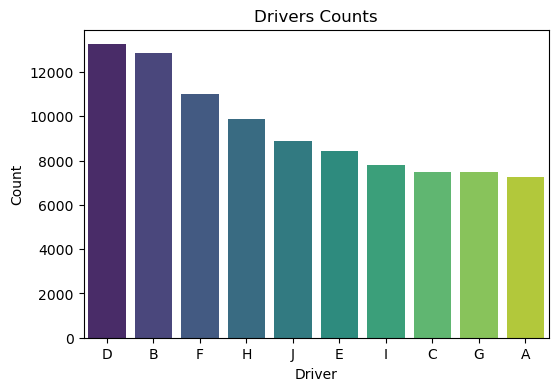

In [7]:
# Count occurrences of each driver
driver_counts = data['Class'].value_counts()

# Plot using seaborn for a more aesthetic plot
plt.figure(figsize=(6, 4))
sns.barplot(x=driver_counts.index, y=driver_counts.values, palette='viridis')
plt.title('Drivers Counts')
plt.xlabel('Driver')
plt.ylabel('Count')
plt.show()

- **The data is unbalanced, with significantly more instances in drivers (A, B) compared to others (G, A).**

### Investigating Redundant and Constant Features

In [10]:
# Create a copy of the original DataFrame called df_copy
df_copy = data.copy()

In [14]:
def driverDataframe(df, pathOrder, driver):
    """
    Extracts and processes data for a specific driver and path order.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        pathOrder (int): The path order to filter the data.
        driver (str): The driver (class) to filter the data.

    Returns:
        DataFrame: Processed DataFrame containing data for the specified driver and path order.
    """
    
    driver_df = df[df['PathOrder'] == pathOrder]
    driver_df = driver_df[driver_df['Class'] == driver]
    driver_df = driver_df.sort_values(by='Time(s)')
    driver_df.drop(columns=['Class', 'PathOrder'], inplace=True)
    driver_df = driver_df.groupby('Time(s)').mean()
    return driver_df

In [15]:
# List to hold individual DataFrames
df_list = []

# Nested loops to process each path and driver
for path in df_copy['PathOrder'].unique():
    for driver in df_copy['Class'].unique():
        df = driverDataframe(df_copy, path, driver)
        df_list.append(df)

# Concatenate all DataFrames in the list into one master DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

In [16]:
combined_df

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle
0,595.2,0.0,7.55,0.0,55.0,129.0,0.0,-0.4,974.0,12.90,12.70,-6.35,62.5,870.0,10.35,44.30,2.00,63.65,508.0,0.0,0.0,554.90,0.0,59.5,1.0,0.0,0.0,0.0,-4.25,1.0,166.80,0.0,-8.1,224.0,-0.90
1,537.6,0.0,6.60,0.0,39.0,129.0,0.0,-0.4,1161.5,6.05,11.70,-3.95,62.5,880.0,6.05,29.05,2.00,65.45,508.0,0.0,0.0,1113.75,0.0,59.5,1.0,0.0,0.0,0.0,-3.95,1.0,165.50,0.0,-4.2,0.0,-1.05
2,326.4,0.0,5.90,0.0,33.5,129.0,0.0,-0.4,1098.0,6.05,11.30,4.10,62.5,880.0,6.05,24.15,2.00,64.45,508.0,0.0,0.0,1088.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.85,0.0,-0.2,0.0,-1.00
3,268.8,0.0,5.65,0.0,32.0,129.0,0.0,-0.4,995.0,6.65,10.90,6.35,62.5,880.0,6.65,22.75,2.15,62.90,508.0,0.0,0.0,980.00,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-1.00
4,275.2,0.0,6.15,0.0,34.5,129.0,0.0,-0.8,947.0,8.00,13.45,6.20,62.5,880.0,8.00,24.50,2.15,62.10,508.0,0.0,1.0,917.65,0.0,59.5,1.0,0.0,0.0,0.0,0.05,1.0,0.90,0.0,-0.2,0.0,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46331,358.4,0.0,7.10,0.0,59.0,2.0,0.0,6.3,679.0,21.10,14.50,-4.90,85.0,670.0,21.10,47.80,2.00,56.60,508.0,0.0,1.0,0.00,1.0,84.0,1.0,0.0,5.0,0.0,0.00,2.0,51.90,0.0,-0.1,0.0,10.60
46332,358.4,0.0,7.10,-0.8,58.0,2.0,0.0,6.3,678.0,21.10,14.80,-3.00,85.0,670.0,21.10,45.90,2.00,56.60,508.0,0.0,1.0,0.00,0.0,84.0,1.0,0.0,14.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.70
46333,332.8,0.0,6.60,-1.6,56.0,2.0,0.0,6.3,674.0,19.10,14.50,-5.30,85.0,670.0,19.10,44.70,2.00,56.60,508.0,0.0,1.0,299.80,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,56.20,0.0,-0.1,0.0,10.80
46334,307.2,0.0,6.10,-2.3,51.0,2.0,0.0,7.0,673.0,17.60,15.20,-2.60,86.0,670.0,17.60,39.60,2.00,56.60,508.0,0.0,1.0,651.00,0.0,84.0,1.0,0.0,0.0,0.0,0.00,2.0,54.90,0.0,-0.1,0.0,10.60


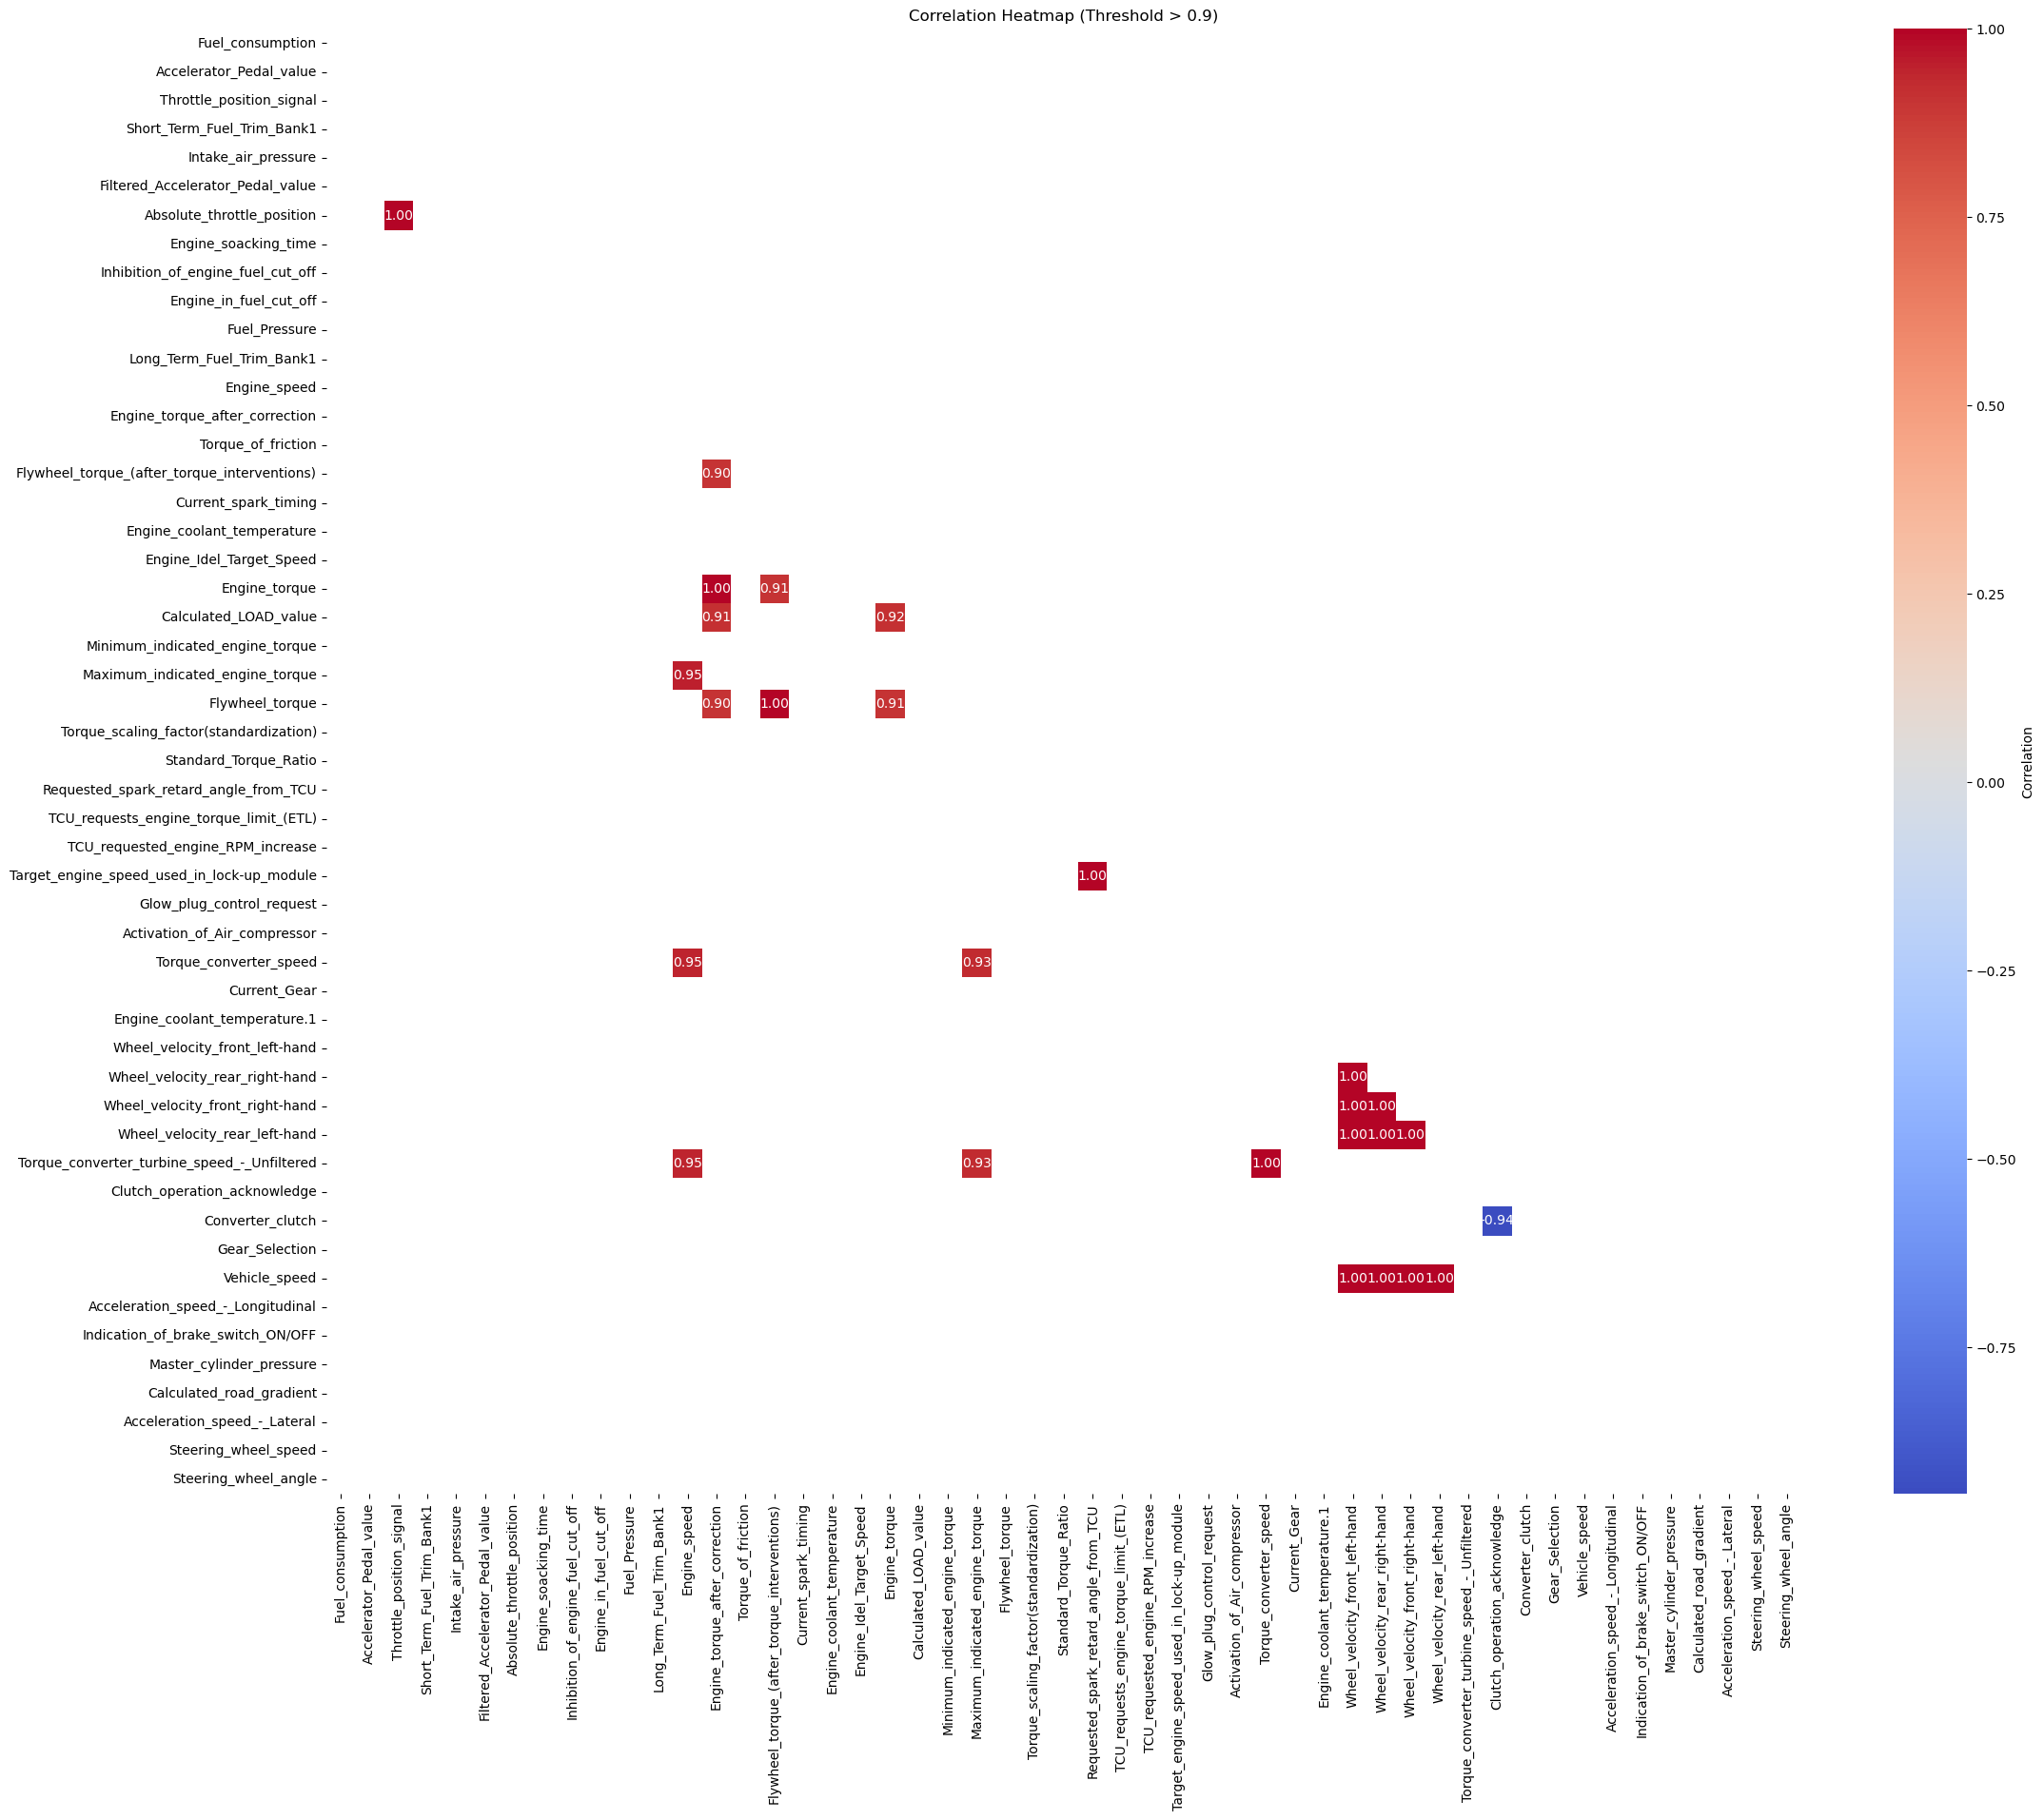

In [11]:
# refer to : https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap


# threshold of corr
threshold = 0.9

# Calculate the correlation matrix
var = combined_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(var, dtype=bool))

# Apply the threshold to mask the lower triangle
mask_lower = np.tril(abs(var) < threshold)

# Combine the masks
mask_combined = mask | mask_lower

# Create a heatmap with the masked correlations
plt.figure(figsize=(25, 20))
sns.heatmap(var, mask=mask_combined, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

### Insights:
**Columns have highly correlatoin**
 - `Wheel_velocity_rear_right-hand`, `Wheel_velocity_rear_left-hand`, `Wheel_velocity_front_right-hand`, `Wheel_velocity_front_left-hand`, `Vehicle_speed`
 - `Throttle_position_signal`, `Absolute_throttle_position`
 - `Engine_torque_after_correction`, `Engine_torque`
 - `Flywheel_torque_(after_torque_interventions)`, `Flywheel_torque`
 - `Requested_spark_retard_angle_from_TCU`, `Target_engine_speed_used_in_lock-up_module`
 - `Torque_converter_speed`, `Torque_converter_turbine_speed_-_Unfiltered`

### Compare the Features of Highly Correlated for All Drivers 

In [12]:
def plot_feature_distributions(df, features):
    """
    Plots the distributions of specified features in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        features (list): A list of feature names to plot distributions for.
    """

    fig, axes = plt.subplots(1, len(features), figsize=(20, 5))  # Create a row of subplots

    for i, feature in enumerate(features):
        ax = axes[i]
        df[feature].plot(kind='hist', bins=30, ax=ax, alpha=0.7, color='blue', edgecolor='black')
        df[feature].plot(kind='kde', ax=ax, secondary_y=True, color='red')
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.right_ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

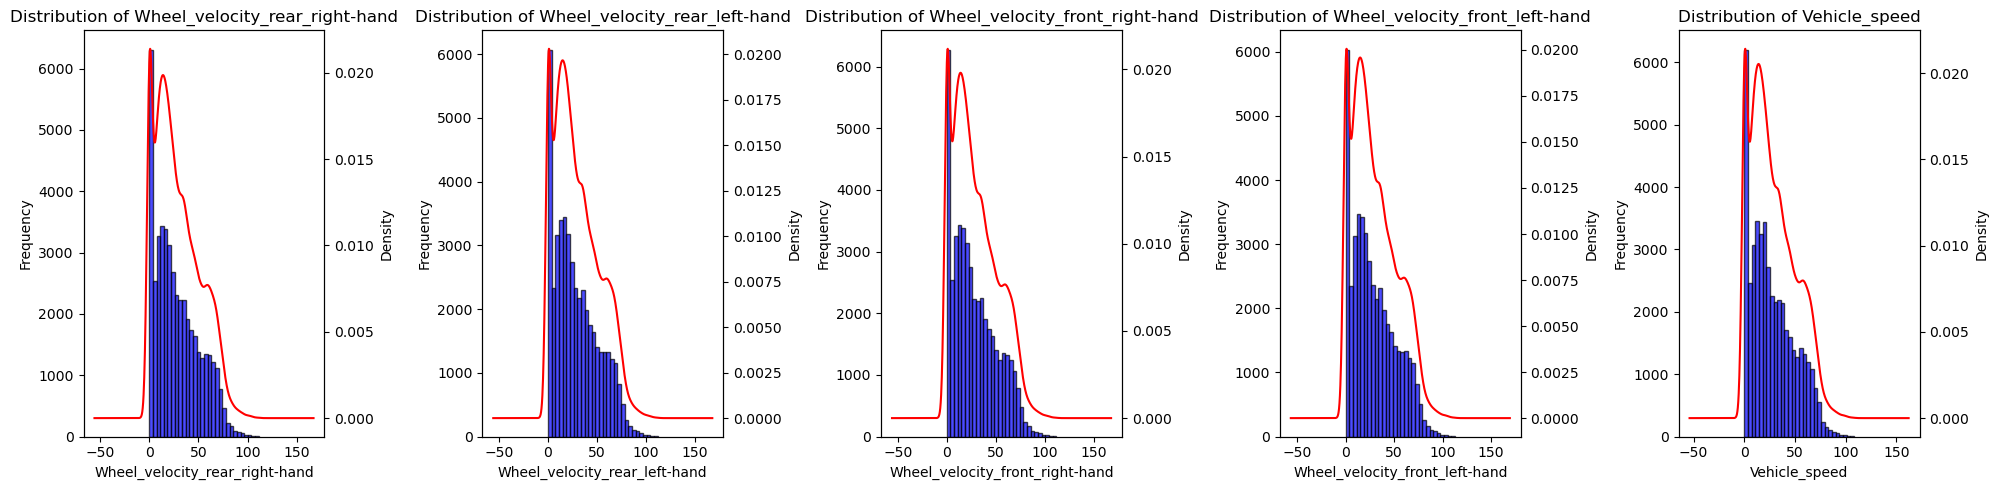

In [13]:
features = ['Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Wheel_velocity_front_right-hand', 'Wheel_velocity_front_left-hand', 'Vehicle_speed']  # Replace with actual feature names
plot_feature_distributions(combined_df, features)

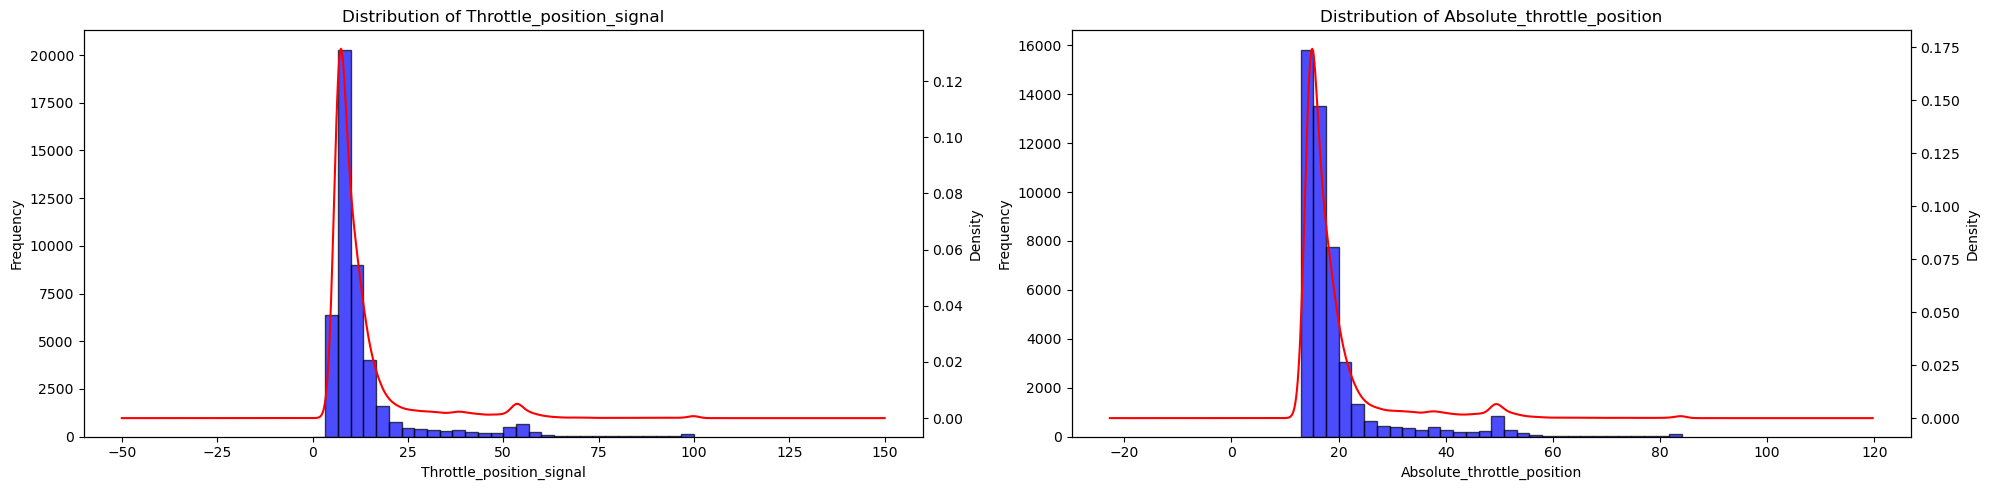

In [14]:
features = ['Throttle_position_signal', 'Absolute_throttle_position']  
plot_feature_distributions(combined_df, features)

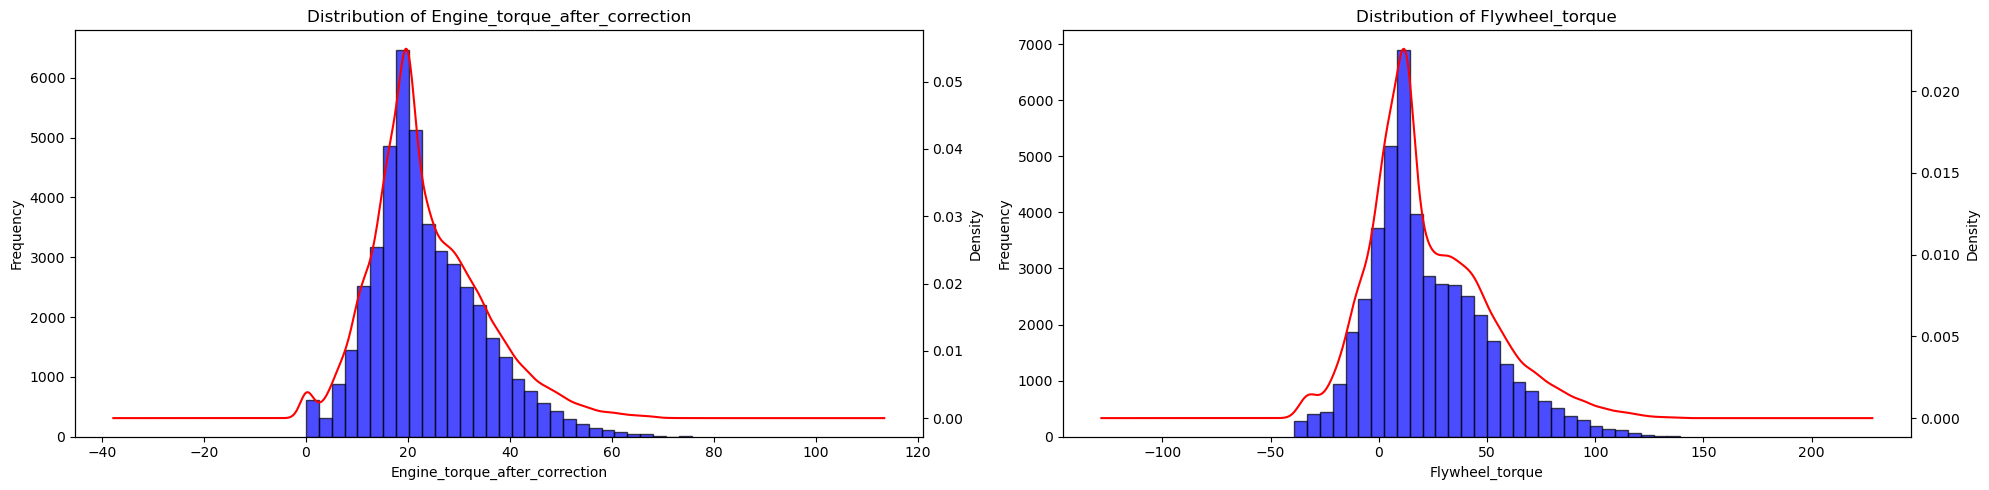

In [15]:
features = ['Engine_torque_after_correction', 'Flywheel_torque']  
plot_feature_distributions(combined_df, features)

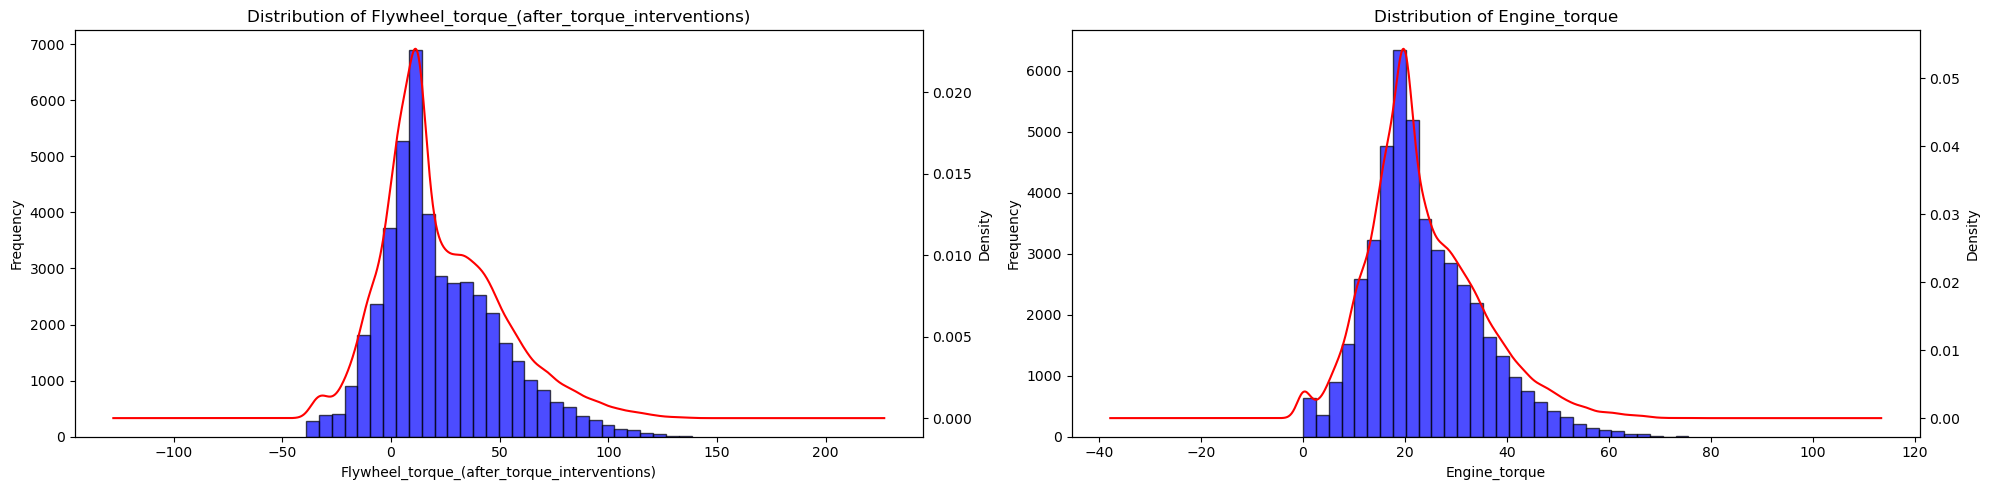

In [16]:
features = ['Flywheel_torque_(after_torque_interventions)', 'Engine_torque']
plot_feature_distributions(combined_df, features)

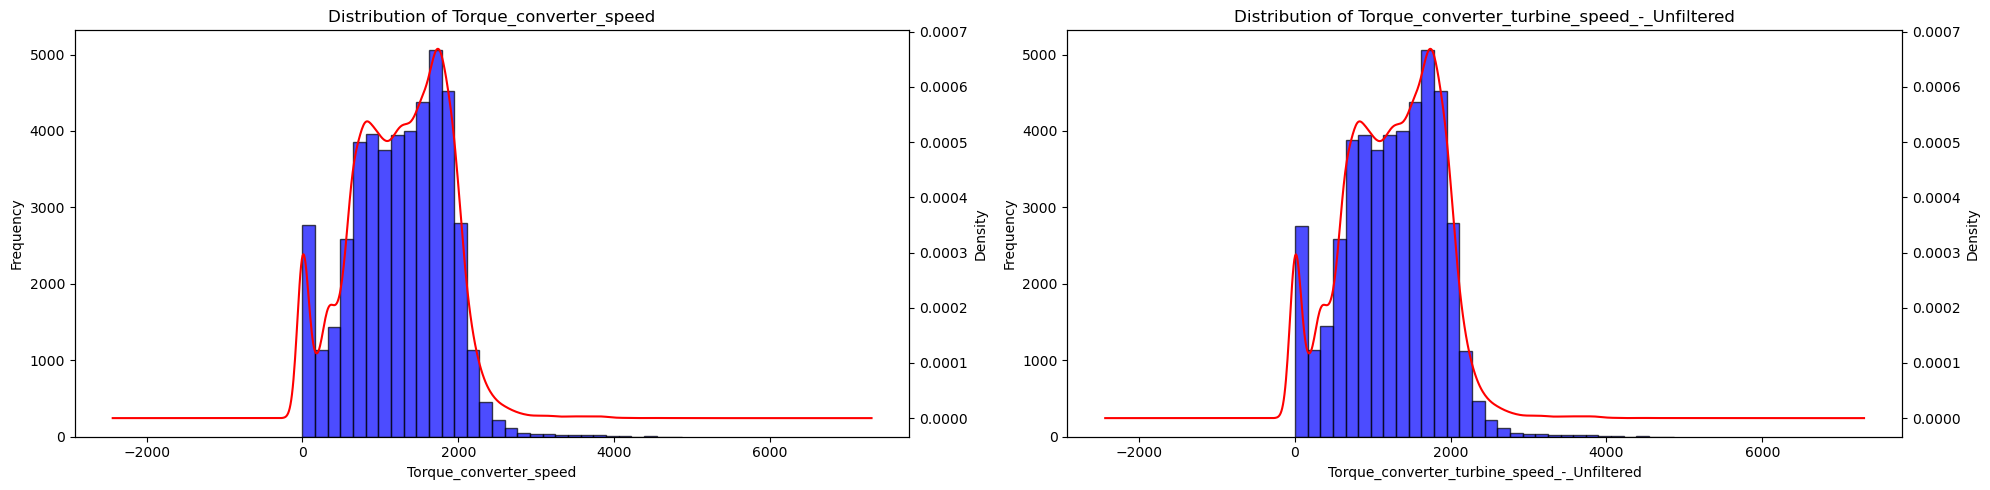

In [17]:
features = ['Torque_converter_speed', 'Torque_converter_turbine_speed_-_Unfiltered']
plot_feature_distributions(combined_df, features)

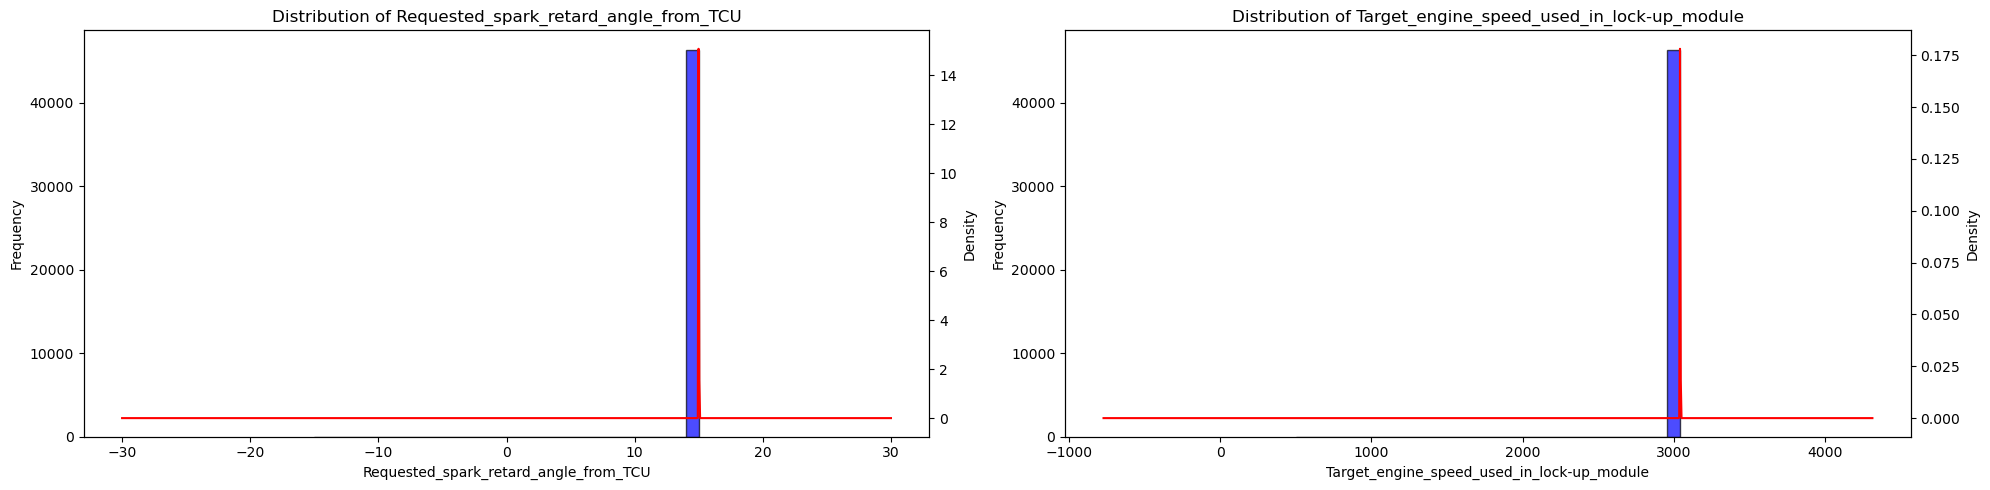

In [18]:
features = ['Requested_spark_retard_angle_from_TCU', 'Target_engine_speed_used_in_lock-up_module']
plot_feature_distributions(combined_df, features)

### check constant features

In [19]:
cols_nunique_1 = []
for col in combined_df.columns:
    if combined_df[col].nunique() == 1:
        cols_nunique_1.append(col)
        
cols_nunique_1

['Filtered_Accelerator_Pedal_value',
 'Inhibition_of_engine_fuel_cut_off',
 'Fuel_Pressure',
 'Torque_scaling_factor(standardization)',
 'Glow_plug_control_request']

In [20]:
driver_A = driverDataframe(df_copy, 1, 'C')

In [21]:
cols_nunique_1 = []
for col in driver_A.columns:
    if driver_A[col].nunique() == 1:
        cols_nunique_1.append(col)
        
cols_nunique_1

['Filtered_Accelerator_Pedal_value',
 'Inhibition_of_engine_fuel_cut_off',
 'Fuel_Pressure',
 'Torque_scaling_factor(standardization)',
 'Standard_Torque_Ratio',
 'Requested_spark_retard_angle_from_TCU',
 'Target_engine_speed_used_in_lock-up_module',
 'Glow_plug_control_request']

In [22]:
constant_features = [ 'Target_engine_speed_used_in_lock-up_module','Requested_spark_retard_angle_from_TCU',
                     'Target_engine_speed_used_in_lock-up_module']

for feature in constant_features:
    print(40* '*' + feature + 40* '*')
    print(combined_df[feature].value_counts())

****************************************Target_engine_speed_used_in_lock-up_module****************************************
Target_engine_speed_used_in_lock-up_module
3040.0    46333
1770.0        2
500.0         1
Name: count, dtype: int64
****************************************Requested_spark_retard_angle_from_TCU****************************************
Requested_spark_retard_angle_from_TCU
 15.0    46333
 0.0         2
-15.0        1
Name: count, dtype: int64
****************************************Target_engine_speed_used_in_lock-up_module****************************************
Target_engine_speed_used_in_lock-up_module
3040.0    46333
1770.0        2
500.0         1
Name: count, dtype: int64


### **From the previous observations I will drop these columns:**
 -  `Wheel_velocity_rear_right-hand`, `Wheel_velocity_rear_left-hand`, `Wheel_velocity_front_right-hand`,
 -  `Wheel_velocity_front_left-hand`, `Absolute_throttle_position`, `Flywheel_torque`,
 -  `Flywheel_torque_(after_torque_interventions)`, `Torque_converter_turbine_speed_-_Unfiltered`,
 -  `Filtered_Accelerator_Pedal_value`, `Inhibition_of_engine_fuel_cut_off`, `Fuel_Pressure`, 
 -  `Torque_scaling_factor(standardization)`, `Standard_Torque_Ratio`, `Requested_spark_retard_angle_from_TCU`,
 -  `Target_engine_speed_used_in_lock-up_module`, `Glow_plug_control_request`

In [11]:
drop_columns = ['Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Wheel_velocity_front_right-hand',
                'Wheel_velocity_front_left-hand', 'Absolute_throttle_position', 'Flywheel_torque',
               'Flywheel_torque_(after_torque_interventions)', 'Torque_converter_turbine_speed_-_Unfiltered',
               'Filtered_Accelerator_Pedal_value', 'Inhibition_of_engine_fuel_cut_off', 'Fuel_Pressure', 
                'Torque_scaling_factor(standardization)', 'Standard_Torque_Ratio', 'Requested_spark_retard_angle_from_TCU',
                'Target_engine_speed_used_in_lock-up_module', 'Glow_plug_control_request']

In [12]:
df_copy.drop(columns=drop_columns, inplace=True)

## Compare different features between two pathes

In [17]:
# List to hold individual DataFrames
df_list = []

# Nested loops to process each path and driver
for path in df_copy['PathOrder'].unique():
    for driver in df_copy['Class'].unique():
        df = driverDataframe(df_copy, path, driver)
        df['PathOrder'] = path  # Add PathOrder column back to the DataFrame
        df['Class'] = driver
        df_list.append(df)

# Concatenate all DataFrames in the list into one master DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

In [18]:
# divide the dataset into two datasets to represent each pathOrder
path_1 = combined_df[combined_df['PathOrder'] == 1]
path_2 = combined_df[combined_df['PathOrder'] == 2]

In [19]:
def plot_feature_distributions(df1, df2, feature):
    """
    Plots the distributions of a specified feature for two DataFrames.

    Parameters:
        df1 (DataFrame): The first DataFrame.
        df2 (DataFrame): The second DataFrame.
        feature (str): The feature to plot.

    Returns:
        None
    """

    # Create a row with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Plot histogram and KDE for df1
    df1[feature].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black', ax=axes[0], label='PathOrder 1')
    df1[feature].plot(kind='kde', color='red', ax=axes[0], secondary_y=True, label='df1 KDE')

    # Plot histogram and KDE for df2
    df2[feature].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black', ax=axes[1], label='PathOrder 2')
    df2[feature].plot(kind='kde', color='red', ax=axes[1], secondary_y=True, label='df2 KDE')

    # Set title, labels, and legend for subplot 1
    axes[0].set_title(f'Distribution of {feature} for PathOrder 1')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency/Density')
    axes[0].legend()

    # Set title, labels, and legend for subplot 2
    axes[1].set_title(f'Distribution of {feature} for PathOrder 2')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Frequency/Density')
    axes[1].legend()

    plt.tight_layout()  # Adjust layout
    plt.show()

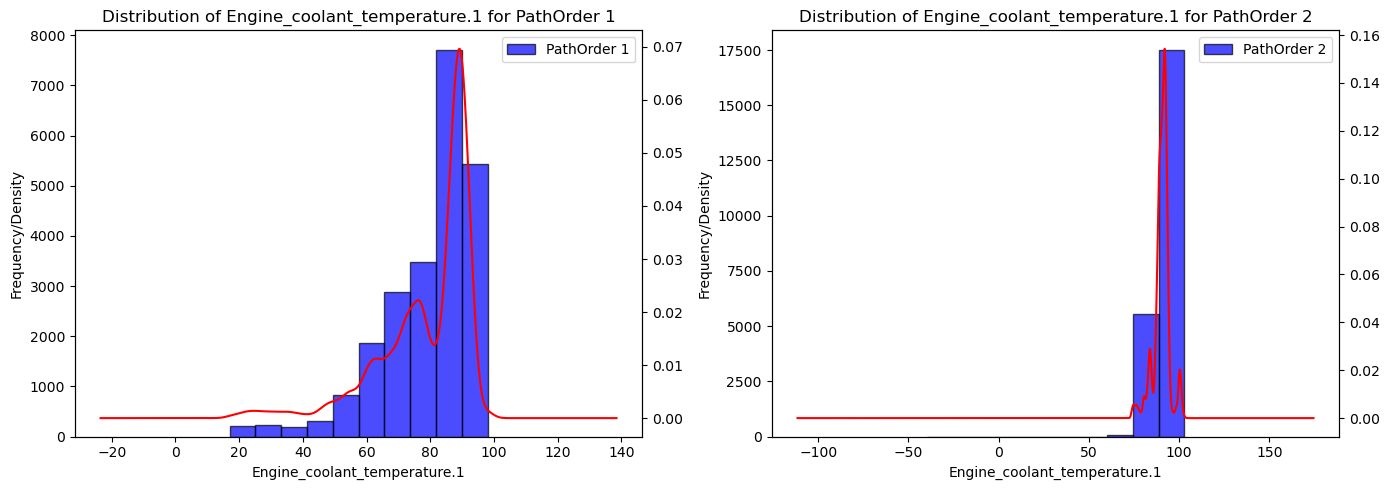

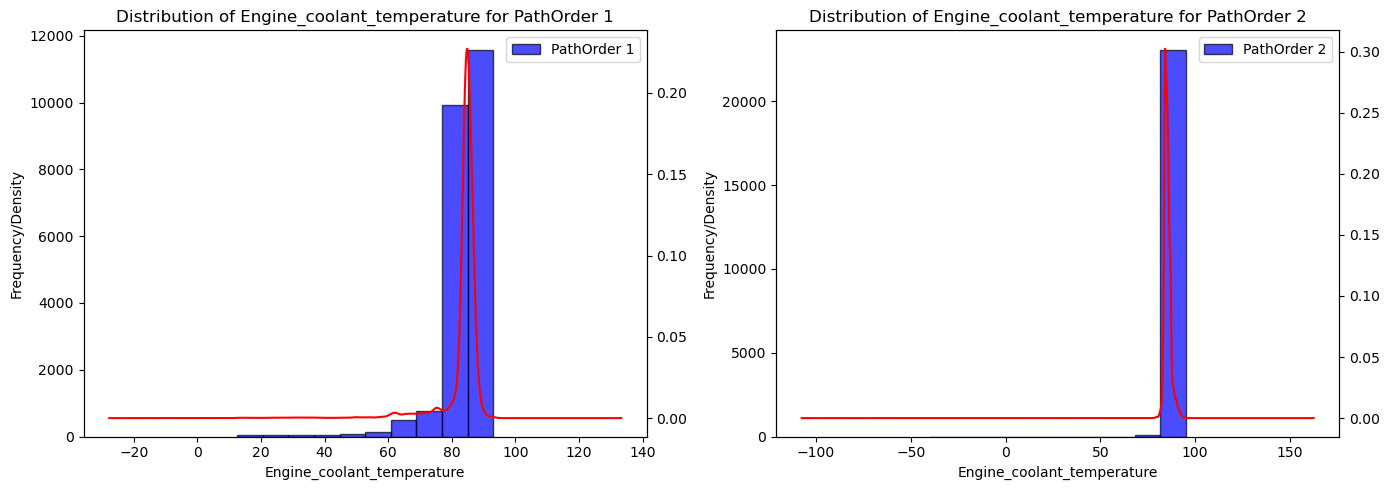

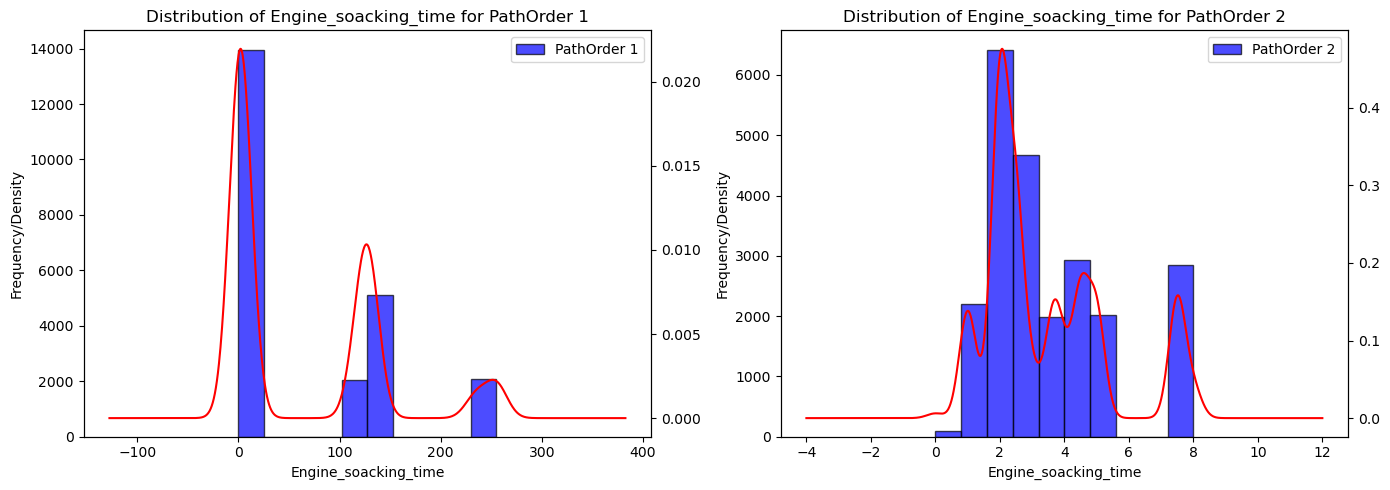

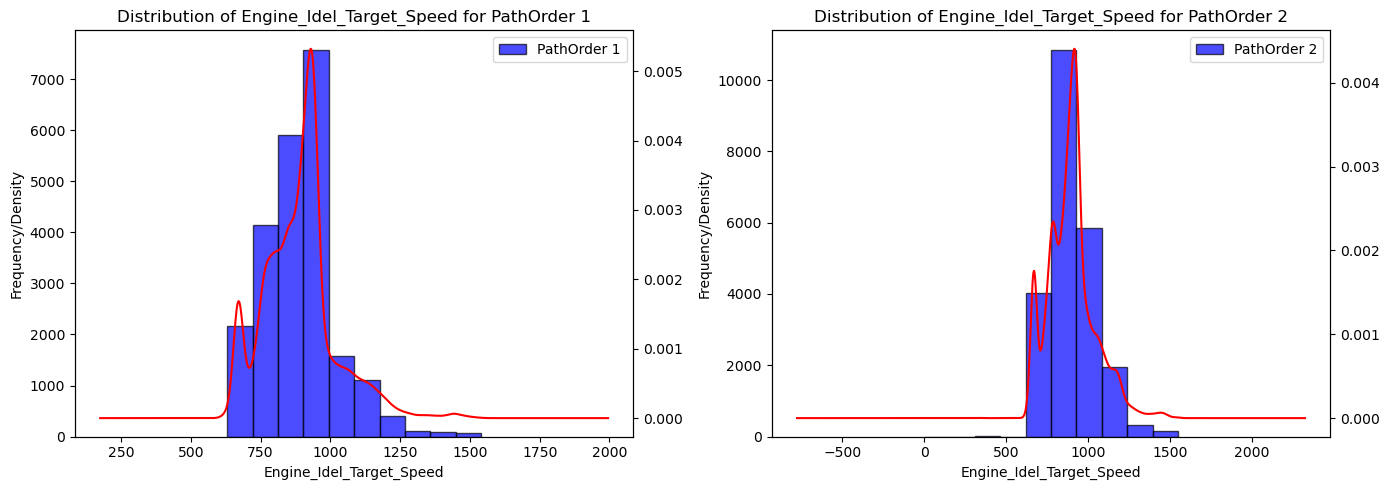

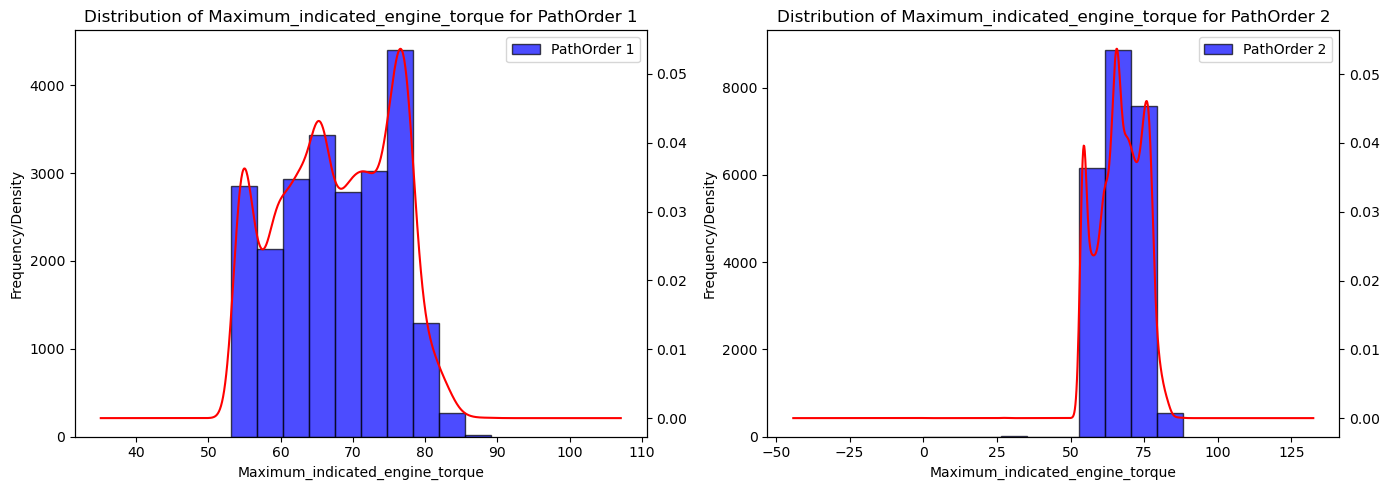

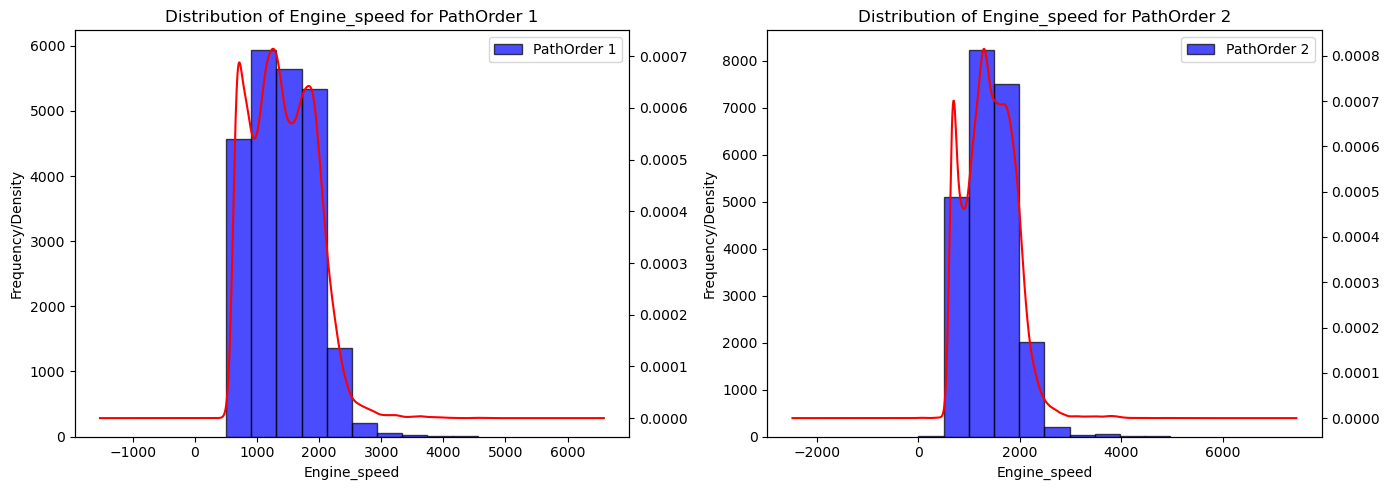

In [20]:
features = ['Engine_coolant_temperature.1',  'Engine_coolant_temperature','Engine_soacking_time',
            'Engine_Idel_Target_Speed','Maximum_indicated_engine_torque', 'Engine_speed']
for feature in features:
    plot_feature_distributions(path_1, path_2, feature)

### PathOrder 1:
- **More varied driving conditions.**
- **Includes different types of roads and varying traffic conditions.**
- **Frequent changes in driving behavior (stops, accelerations).**
- **Wider range of engine coolant temperatures.**
- **Indicates different engine loads and possibly less efficient cooling.**
- **Longer frequent soak times.**

### PathOrder 2:

- **More consistent driving environment.**
- **Route involves longer, continuous driving periods, such as highways.**
- **Stable traffic conditions with fewer changes in driving behavior.**
- **high-temperature range for engine coolant.**
- **Engine operates under a more constant load.**
- **Less frequent soak times.**
- **More consistent engine speed.**

## Compare different features of Drivers in the same Path

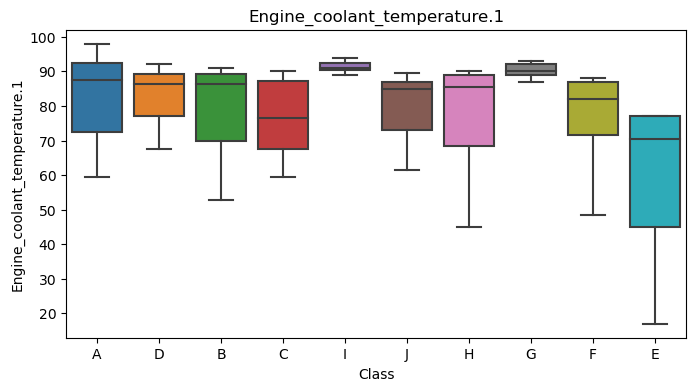

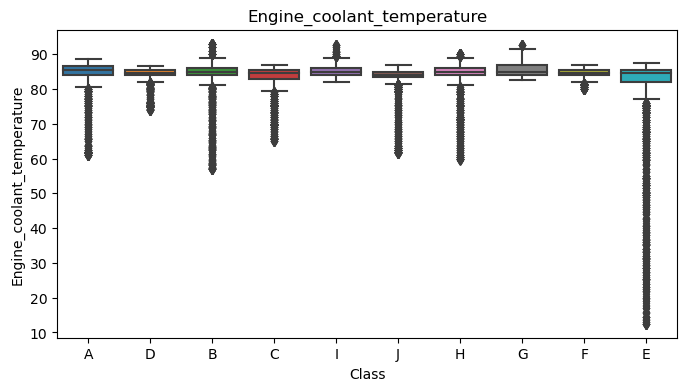

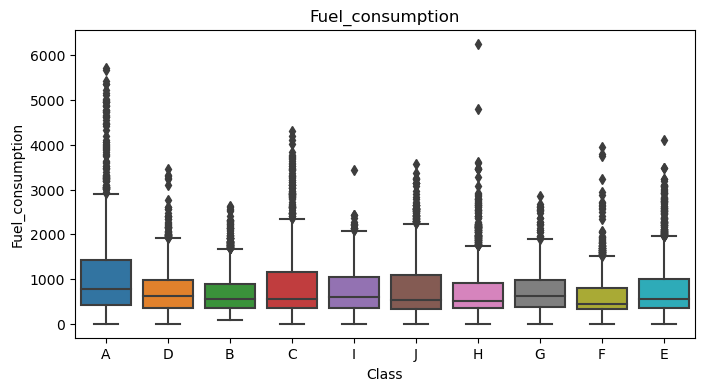

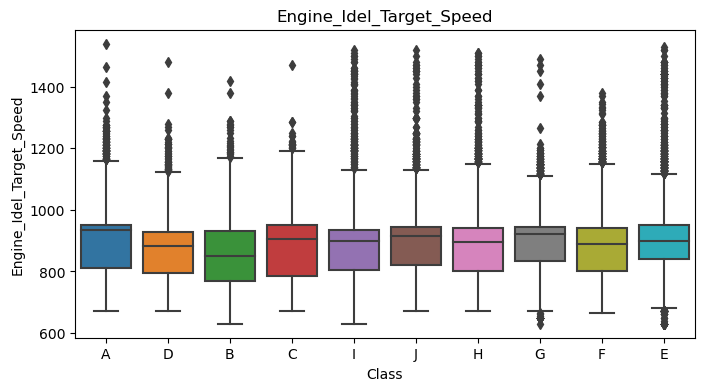

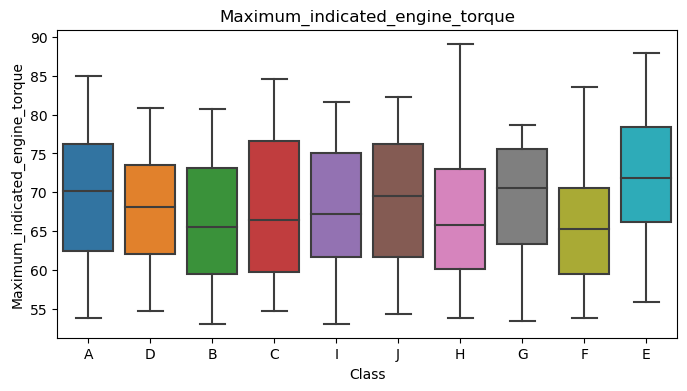

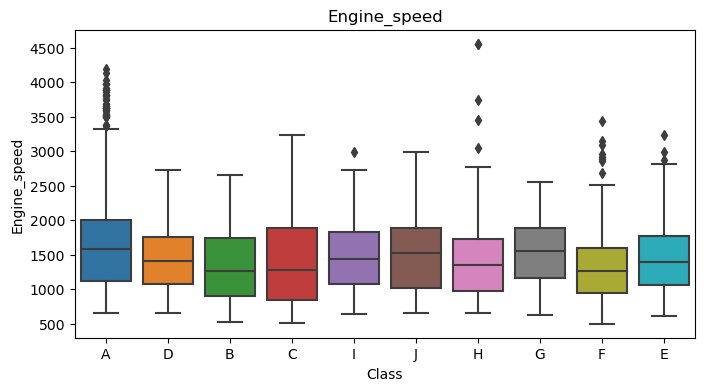

In [22]:
# Create the box plot
features = ['Engine_coolant_temperature.1',  'Engine_coolant_temperature', 'Fuel_consumption',
            'Engine_Idel_Target_Speed','Maximum_indicated_engine_torque', 'Engine_speed']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=feature, data=path_1)
    plt.title(feature)
    plt.show()


- **Driver I and G have the most consistent and highest median engine coolant temperatures (~95°C), indicating highly controlled and optimized operational conditions.**
- **Driver I and G are likely used in environments requiring consistent performance (highway driving).**
- **Driver E and H display significant variability and lower temperatures, suggesting potential issues with stable operational conditions.**
- **Driver E and H might be used in varied conditions leading to greater temperature fluctuations (city driving).**
- **Driver A operates frequently at higher engine speeds, indicating high-performance or demanding driving conditions.**
- **Driver I has lower engine speeds, suggesting less demanding, possibly more fuel-efficient driving conditions.**



### Drivers in pathOrder 2

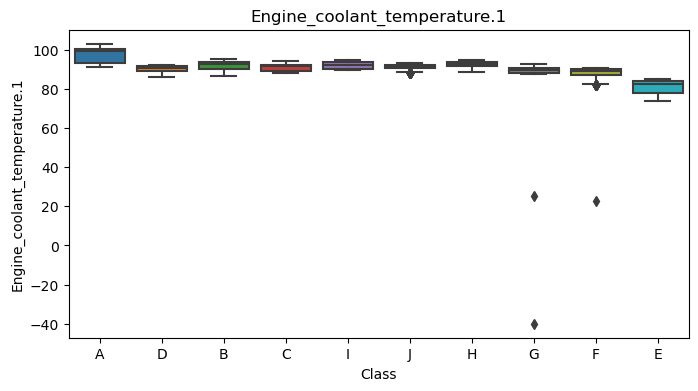

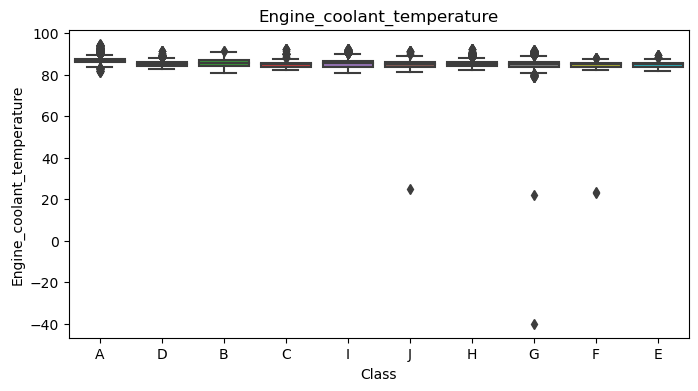

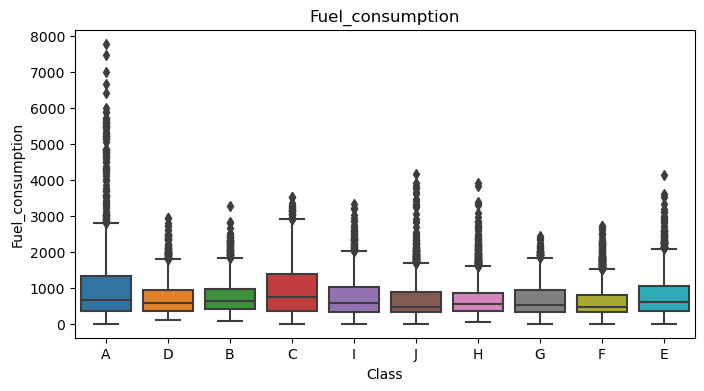

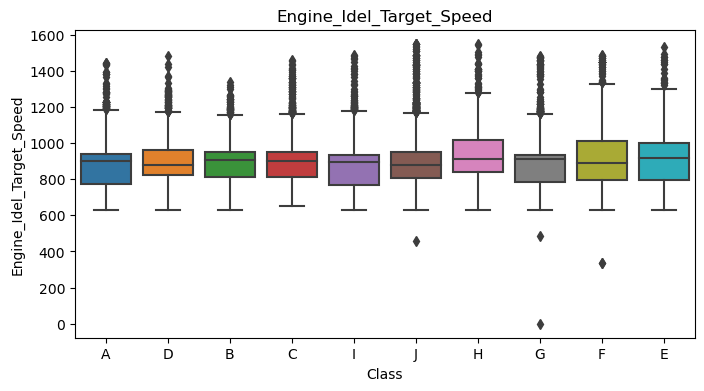

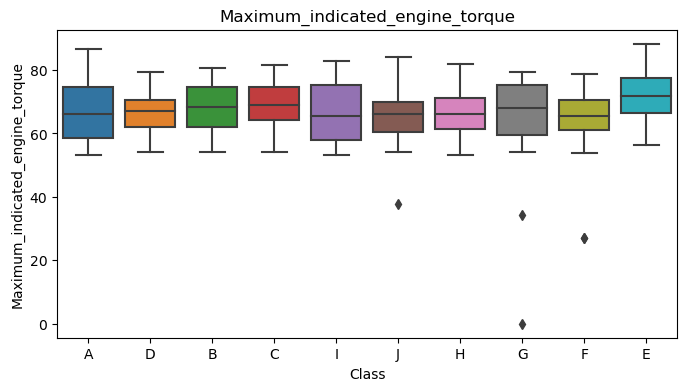

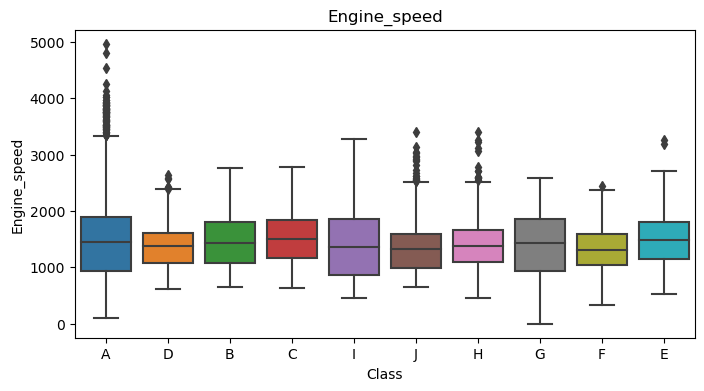

In [23]:
# Create the box plot
features = ['Engine_coolant_temperature.1',  'Engine_coolant_temperature', 'Fuel_consumption',
            'Engine_Idel_Target_Speed','Maximum_indicated_engine_torque', 'Engine_speed']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=feature, data=path_2)
    plt.title(feature)
    plt.show()

- **Most drivers have a consistent engine coolant temperature around 90 to 100 degrees, which is typical for an operational engine.**
- **Most drivers exhibit lower and more consistent fuel consumption,because the consistent driving patterns.**
- **Driver A and I show higher and more variable engine speeds, indicating potential differences in driving style.**
- **Drivers D, B, C, J, H, G, F, and E exhibit lower and more consistent engine speeds, because the consistent driving patterns.**

### Conclusion

- **This analysis of the distirbution of the features provide valuable insights of  behaviors and patterns that can be crucial for detecting the actual owner of a vehicle. By identifying and analyzing these unique patterns, we can develop reliable methods to verify the identity of the driver, thereby enhancing security measures and preventing vehicle theft. Understanding these driving behaviors allows for the implementation of advanced monitoring systems that can detect anomalies and ensure that only authorized individuals are operating the vehicle. This approach not only improves vehicle security but also provides peace of mind to owners through enhanced theft prevention mechanisms.**